# Make Predictions with a Neural Network

In [11]:
# Initial imports
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Data Generation and Preprocessing

In [12]:
# Generate 1000 demo data samples with 2 features and two centers
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

In [13]:
# Transforming y to a vertical vector
y = y.reshape(-1, 1)
y.shape


(1000, 1)

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

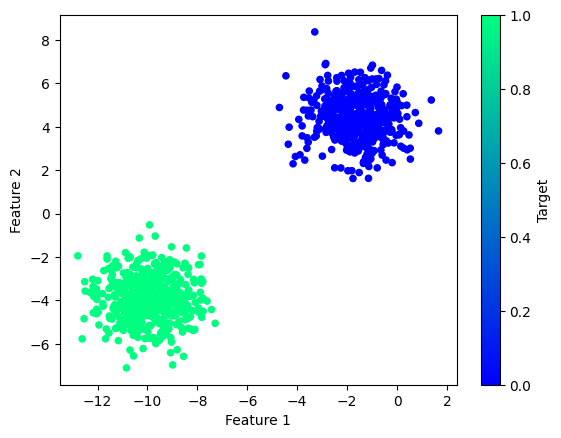

In [17]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

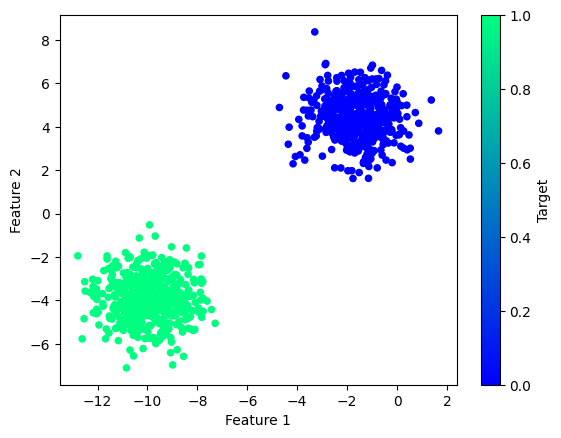

In [18]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [19]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Creating a Neural Network Model

In [21]:
# Create a sequential neural network model
neuron = Sequential()

2023-11-25 21:31:23.347869: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 21:31:23.352821: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [22]:
# Add the input and the hidden layer to the model
number_inputs = 2
number_hidden_nodes = 1
neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [23]:
# Add the output layer
number_classes = 1
neuron.add(Dense(units=number_classes, activation="sigmoid"))

In [24]:
# Display model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


## Compiling a Neural Network Model

In [25]:
# Compile the model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Fitting and Testing a Neural Network

In [26]:
# Fitting the model
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.9960
Epoch 2/100
24/24 [==============================] - 0s 895us/step - loss: 0.5757 - accuracy: 0.9960
Epoch 3/100
24/24 [==============================] - 0s 908us/step - loss: 0.5619 - accuracy: 0.9973
Epoch 4/100
24/24 [==============================] - 0s 864us/step - loss: 0.5479 - accuracy: 0.9987
Epoch 5/100
24/24 [==============================] - 0s 784us/step - loss: 0.5335 - accuracy: 0.9987
Epoch 6/100
24/24 [==============================] - 0s 741us/step - loss: 0.5190 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 734us/step - loss: 0.5045 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 779us/step - loss: 0.4900 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 743us/step - loss: 0.4757 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 745us/step - loss: 0.4615 - accuracy

## Plotting Loss and Accuracy

In [34]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

<Axes: >

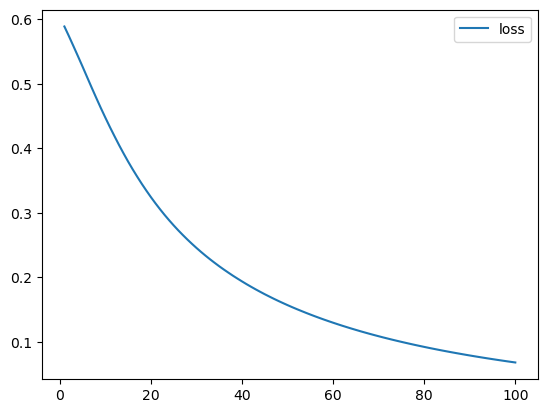

In [35]:
# Plot the loss
df.plot(y="loss")

In [41]:
df.head()

,loss,accuracy
1,0.588841,0.740000
2,0.573748,0.922667
3,0.558170,0.932000
4,0.542409,0.941333
5,0.526438,0.952000


<Axes: >

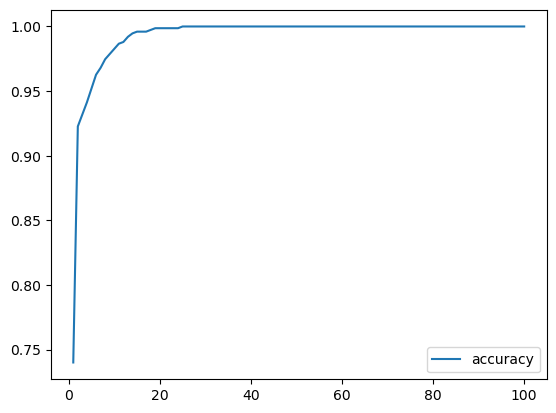

In [36]:
# Plot the accuracy
df.plot(y="accuracy")

### Evaluating the Model Performance

In [37]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0710 - accuracy: 1.0000 - 48ms/epoch - 6ms/step
Loss: 0.07104554772377014, Accuracy: 1.0


## Making Predictions with a Neural Network Model

In [38]:
# Create 10 new samples of dummy data
# Create 10 new samples of dummy data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=1)

In [39]:
# Making predictions
predictions = (neuron.predict(new_X) > 0.5).astype("int32")

1/1 [==============================] - 0s 23ms/step


In [40]:
# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": new_y})

# Display sample data
results.head(10)

,predictions,actual
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,1,0
6,1,0
7,1,1
8,1,0
9,0,0
